In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.mappings import PT_value_mapping
from src.TimeSeriesDataset import TimeSeriesDataset as TSD
from src.mappings import value_mapping, ideology_mapping, social_complexity_mapping


In [2]:
dataset = TSD(file_path='../datasets/25_yr_dataset.xlsx')
exchanges_df = pd.read_csv('../datasets/exchanges.csv')

Dataset loaded from ../datasets/25_yr_dataset.xlsx


In [3]:
exchange_polities = exchanges_df.PolityID.unique()
dataset.scv['exchange'] = 0
dataset.raw['exchange'] = 0
dataset.scv.loc[dataset.scv.PolityName.isin(exchange_polities), 'exchange'] = 1
dataset.raw.loc[dataset.raw.PolityName.isin(exchange_polities), 'exchange'] = 1

In [22]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca_cols = ['Pop', 'Terr', 'Cap', 'Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
df = dataset.scv[pca_cols]
imputer = KNNImputer(n_neighbors=5, weights='uniform')

# Scale numerical features
scaled_data = scaler.fit_transform(df)

# Apply KNN imputation
imputed_data = imputer.fit_transform(scaled_data)

# Transform back to original scale
final_data = scaler.inverse_transform(imputed_data)

# Convert back to DataFrame with original columns
imputed_df = pd.DataFrame(final_data, columns=df.columns, index=df.index)
dataset.scv_imputed = dataset.scv.copy()
dataset.scv_imputed[pca_cols] = imputed_df[pca_cols]

/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/.venv/lib/python3.11/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


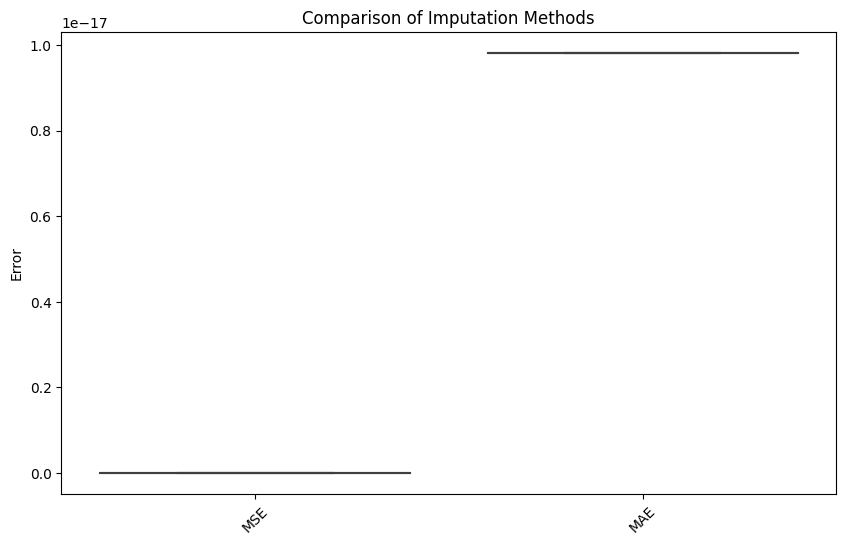


Detailed Metrics:
                        MSE           MAE
KNN            1.957025e-33  9.812668e-18
Mean           1.957025e-33  9.812668e-18
Median         1.957025e-33  9.812668e-18
Most_Frequent  1.957025e-33  9.812668e-18


In [27]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Create mask of missing values to compare later
df = dataset.scv[pca_cols]
original_data = df.copy()
missing_mask = df.isna()

# Different imputation methods
imputers = {
    'KNN': KNNImputer(n_neighbors=5),
    'Mean': SimpleImputer(strategy='mean'),
    'Median': SimpleImputer(strategy='median'),
    'Most_Frequent': SimpleImputer(strategy='most_frequent')
}

# Store results
results = {}
metrics = {}

# Apply each imputation method
for name, imputer in imputers.items():
    # Scale and impute
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    imputed_data = imputer.fit_transform(scaled_data)
    results[name] = scaler.inverse_transform(imputed_data)
    
    # Calculate metrics where true values are known
    known_mask = ~missing_mask
    metrics[name] = {
        'MSE': mean_squared_error(df.values[known_mask], results[name][known_mask]),
        'MAE': mean_absolute_error(df.values[known_mask], results[name][known_mask])
    }

# Visualize comparisons
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(metrics).T)
plt.title('Comparison of Imputation Methods')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.show()

# Print detailed metrics
print("\nDetailed Metrics:")
print(pd.DataFrame(metrics).T)

In [5]:
pca_cols = ['Pop', 'Terr', 'Cap', 'Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
dataset.impute_missing_values(pca_cols)

In [23]:
dataset.scv_imputed['exchange'] = dataset.scv['exchange']
dataset.scv_imputed = dataset.scv_imputed.loc[dataset.scv_imputed.exchange == 1]
dataset.compute_PCA(cols = pca_cols, col_name = 'PCA', n_cols = 2, n_PCA= len(pca_cols))


Explained variance by each PC:
PC1: 58.41%
PC2: 15.21%
PC3: 8.57%
PC4: 6.03%
PC5: 4.48%
PC6: 3.19%
PC7: 2.83%
PC8: 1.28%


PCA(n_components=8)

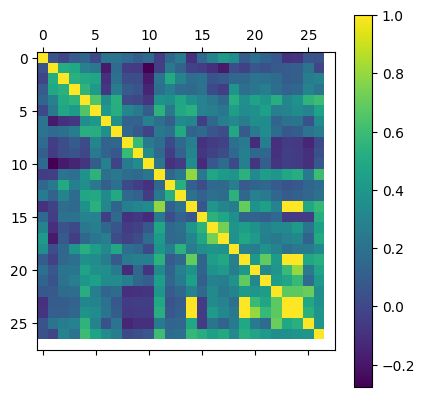

In [17]:
dataset.raw[dataset.raw.exchange == 1][dataset.raw.columns[3:31]].corr()
# plot correlation matrix
plt.matshow(dataset.raw[dataset.raw.exchange == 1][dataset.raw.columns[3:31]].corr())
plt.colorbar()

/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


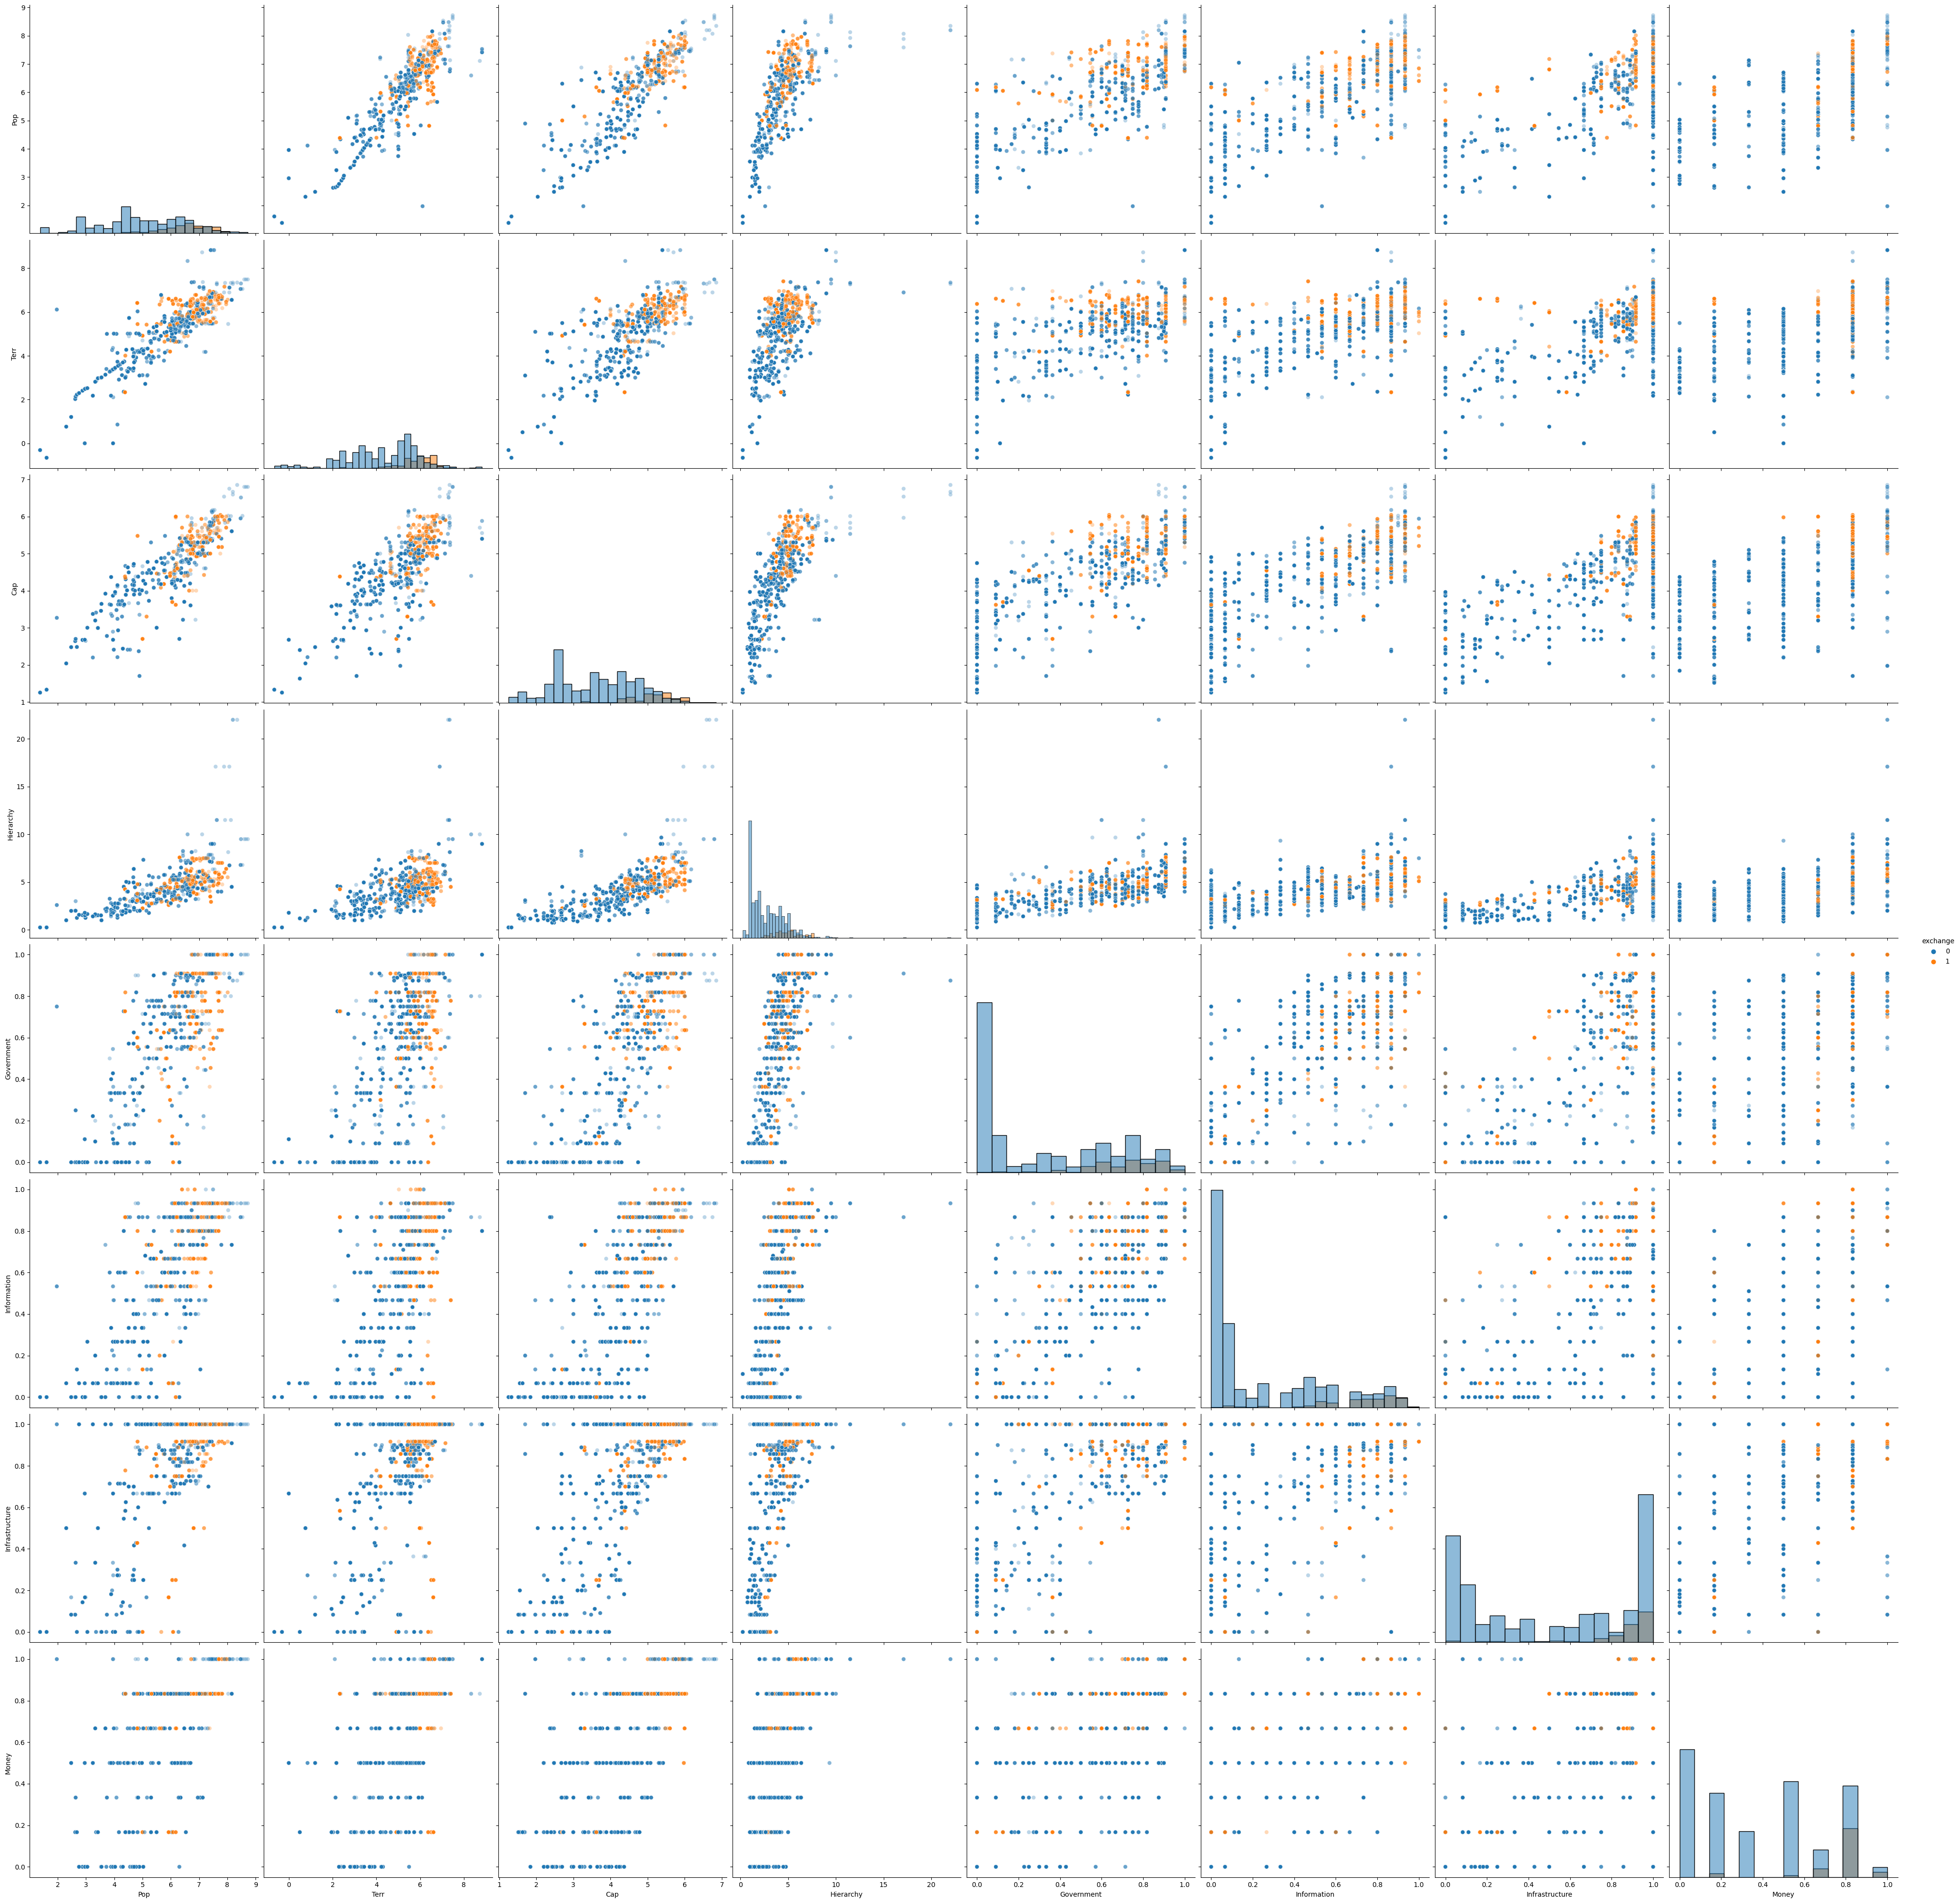

In [6]:
import seaborn as sns
sc_cols = ['Pop','Terr','Cap','Hierarchy','Government','Information','Infrastructure','Money']
plot_df = dataset.scv_imputed#.drop_duplicates(subset=sc_cols+['exchange'])



# Create pairplot with custom alpha per exchange
g = sns.pairplot(
    data=plot_df[sc_cols+['exchange']], 
    hue='exchange',
    diag_kind='hist',
    plot_kws={'alpha': 0.3},
    markers='o',
    size=5,
    height=2
)

plt.show()

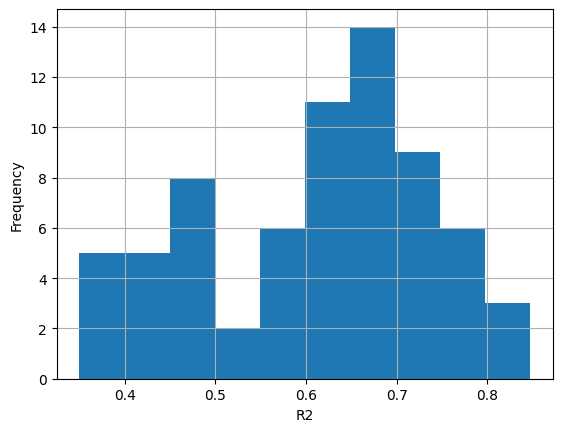

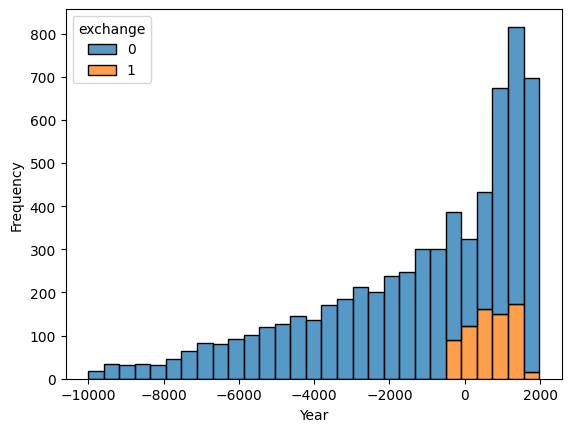

In [15]:
dataset.imputation_fits.R2.hist()
plt.xlabel('R2')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=dataset.scv, x='Year', hue='exchange', multiple='stack')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [8]:
dataset_exchange = TSD(file_path='../datasets/25_yr_dataset.xlsx')
exchange_polities = exchanges_df.PolityID.unique()
dataset_exchange.scv['exchange'] = 0
dataset_exchange.scv.loc[dataset_exchange.scv.PolityName.isin(exchange_polities), 'exchange'] = 1

dataset_exchange.scv = dataset_exchange.scv.loc[dataset_exchange.scv.PolityName.isin(exchange_polities)]

Dataset loaded from ../datasets/25_yr_dataset.xlsx


In [9]:

pca_cols = ['Pop', 'Terr', 'Cap', 'Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
dataset_exchange.impute_missing_values(pca_cols)


Not enough significant variables
p-values for Pop are Hierarchy         0.001324
Government        0.558952
Infrastructure    0.002722
Information       0.115069
Money             0.605919
Name: P>|t|, dtype: float64
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Cap
No best overlap found for Pop
No best overlap found for Cap
No best overlap found for Pop
No best overlap found for Cap
No best overlap found for Pop
No best overlap found for Cap
No best overlap found for Pop
No best overlap found for Cap
No best overlap found for Pop
No best overlap found for Cap
No best overlap found for Pop
No best overlap found for Cap
No 

In [10]:
dataset_exchange.compute_PCA(cols = pca_cols, col_name = 'PCA', n_cols = 2, n_PCA= len(pca_cols))
dataset_exchange.scv_imputed['exchange'] = dataset_exchange.scv['exchange']

there are some NaNs in the imputed dataset
Explained variance by each PC:
PC1: 51.42%
PC2: 17.10%
PC3: 9.98%
PC4: 7.09%
PC5: 5.37%
PC6: 4.31%
PC7: 2.84%
PC8: 1.89%


/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


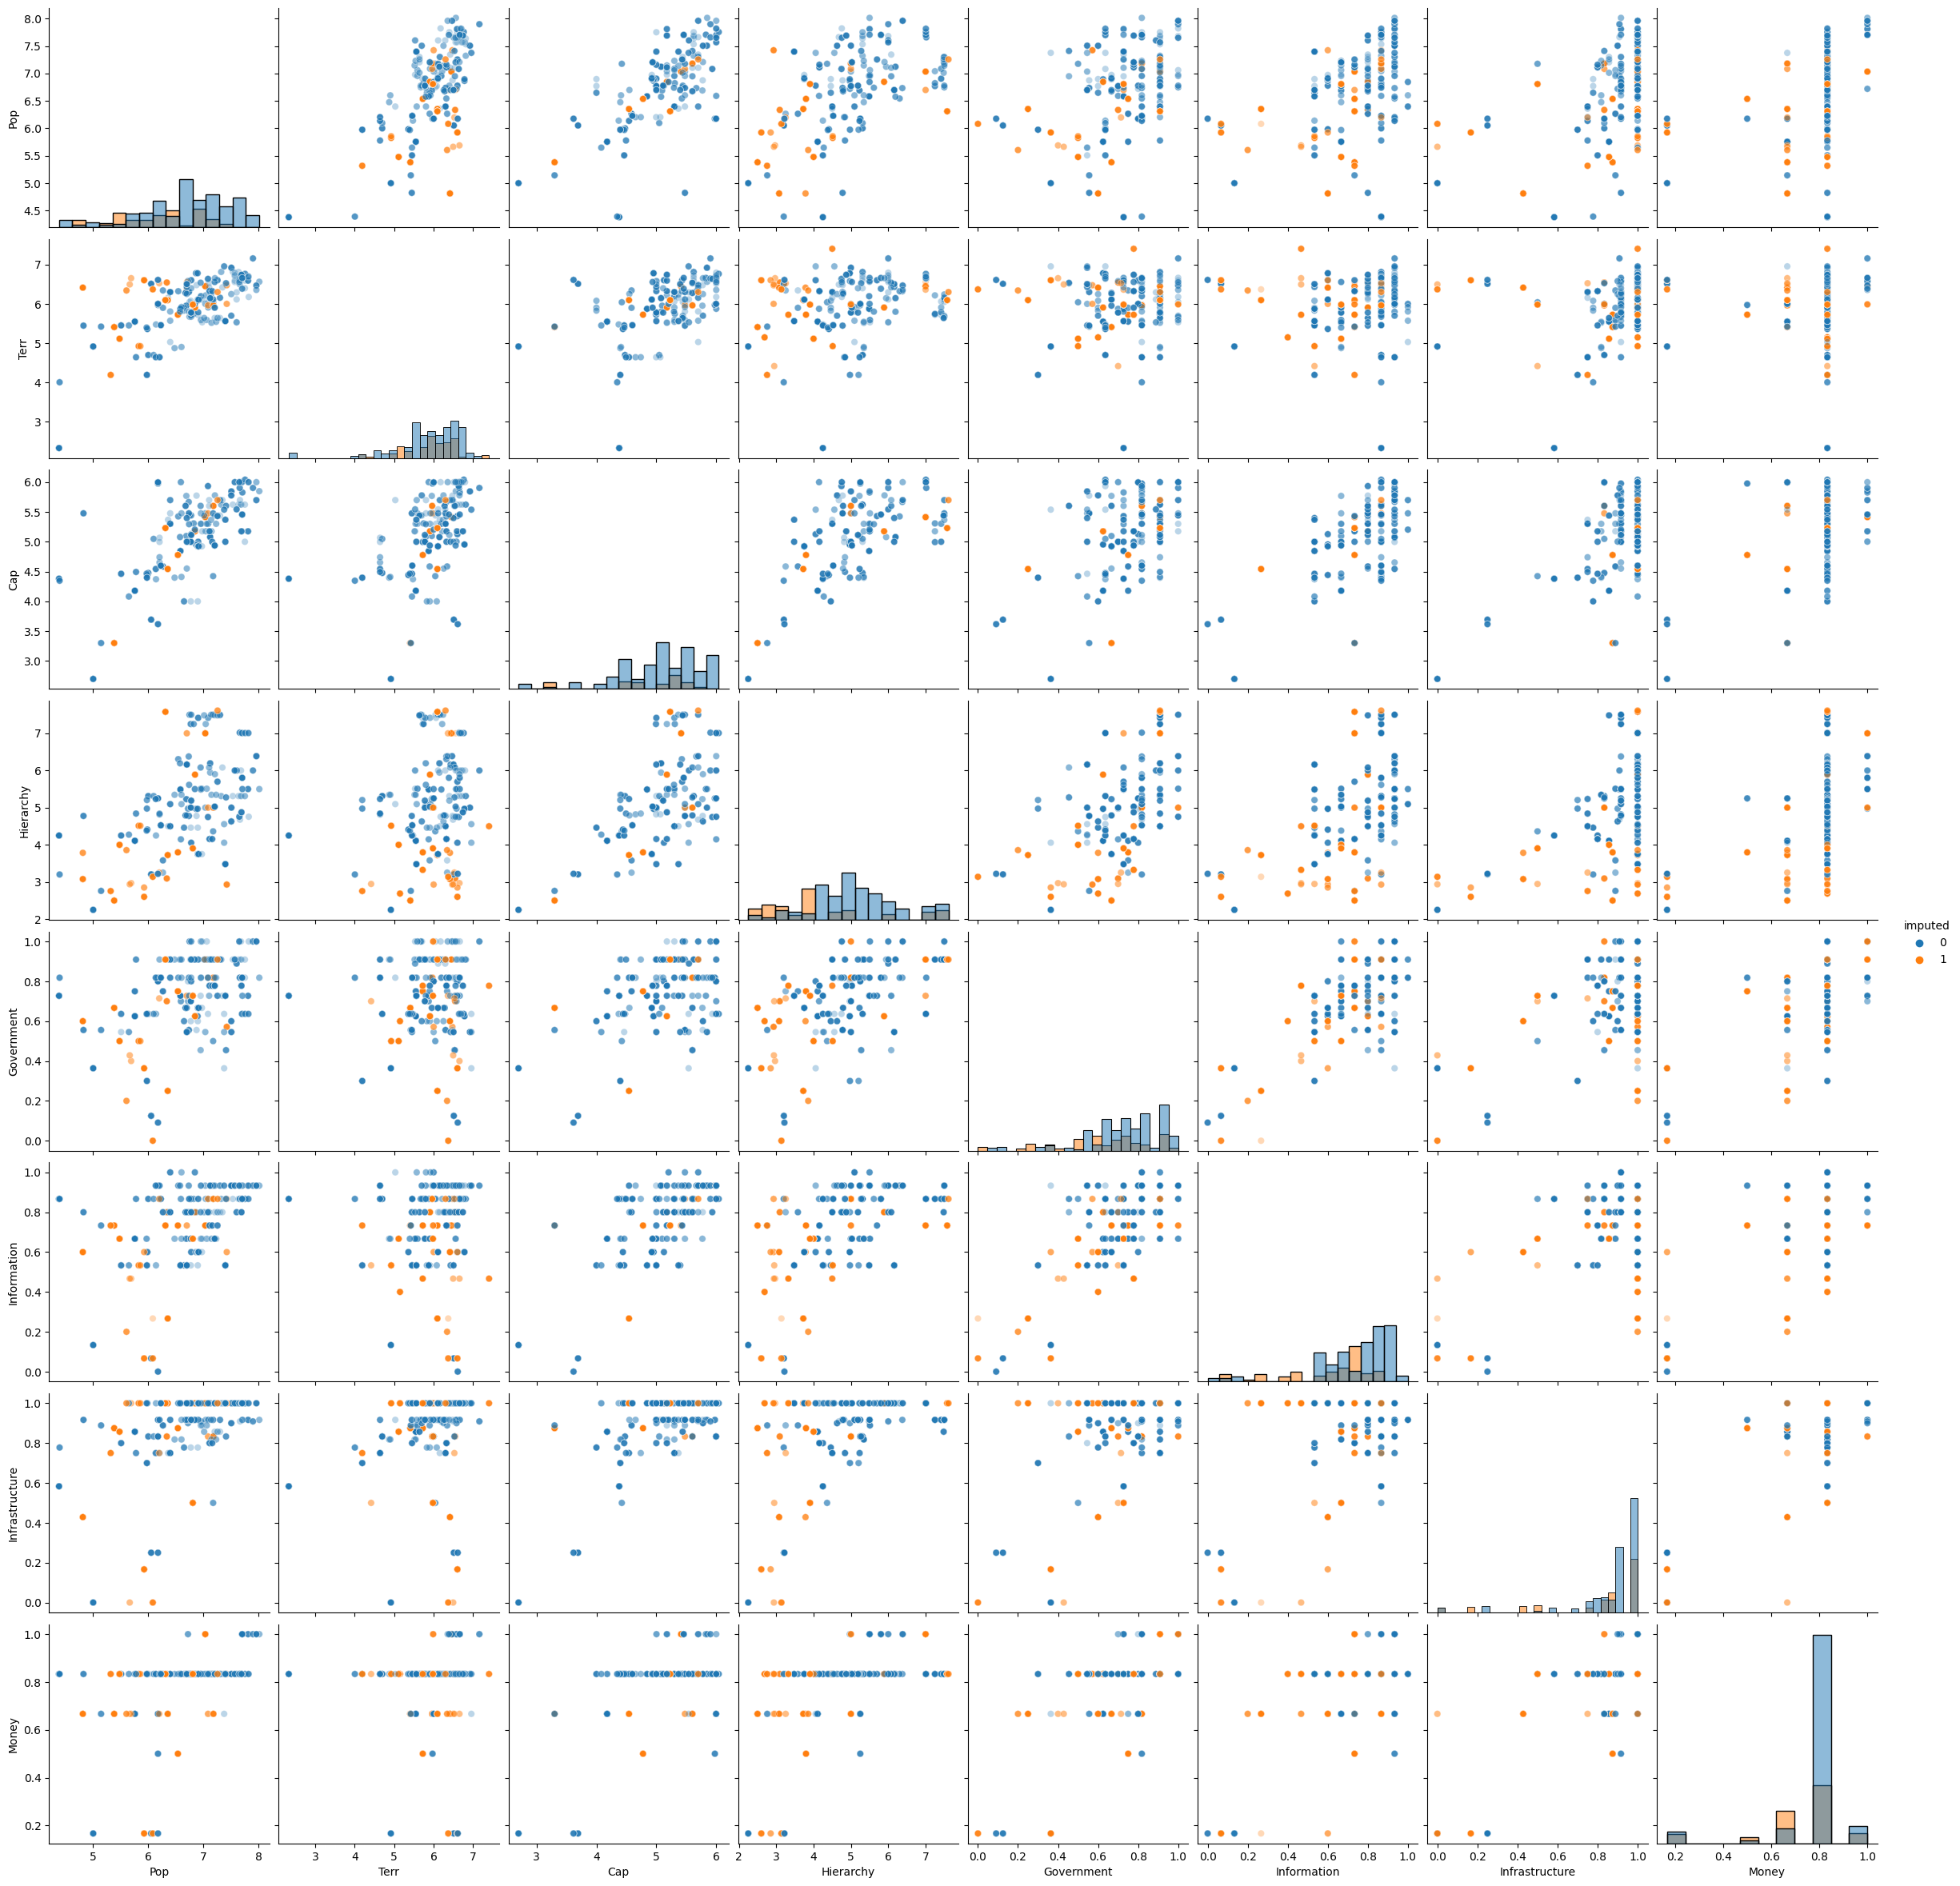

In [11]:
import seaborn as sns
sc_cols = ['Pop','Terr','Cap','Hierarchy','Government','Information','Infrastructure','Money']

dataset_exchange.scv_imputed['imputed'] = 0
dataset_exchange.scv_imputed.loc[dataset_exchange.scv[sc_cols].isna().sum(axis=1)>0,'imputed'] = 1
plot_df = dataset_exchange.scv_imputed#.drop_duplicates(subset=sc_cols+['exchange'])

# Create pairplot with custom alpha per exchange
g = sns.pairplot(
    data=plot_df[sc_cols+['imputed']], 
    hue='imputed',
    diag_kind='hist',
    plot_kws={'alpha': 0.3},
    markers='o',
    size=3,
    height=2
)

plt.show()

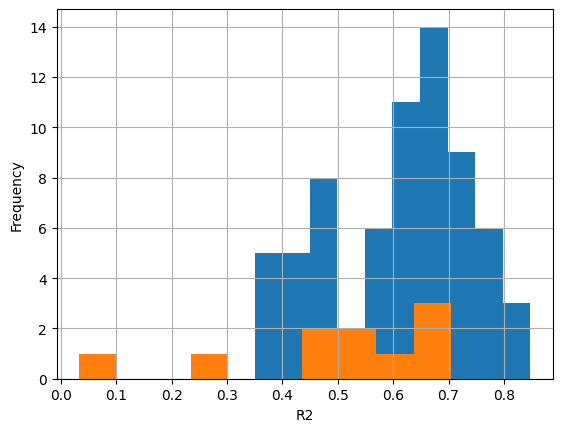

In [12]:
dataset.imputation_fits.R2.hist()
dataset_exchange.imputation_fits.R2.hist()
plt.xlabel('R2')
plt.ylabel('Frequency')
plt.show()